In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xyStripTools
import root_pandas as rp
import pandas as pd

from xyStripTools import T_off
from xyStripTools import plot_track

In [17]:
# The time offset distributions measured for all quadrants of all detectors
# See the Micromegas nimA paper for more information
T_off


#set the drift speed [cm/ns]
v_drift = 0.0008


# Load Raw Electron Recoil Simulation

In [18]:
#Select the gas
gas = 'he_co2'

# Energies to calculate
Energy = 50


# Path to root file
file_path = './data/'+gas+'_'+str(Energy)+'keV_' + str(0) + '.root'

tracks = rp.read_root(file_path)
tracks["track"]=tracks.apply(lambda row: np.array([row.x,row.y,row.z]).T ,axis=1)
tracks


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

,event_number,npoints,x,y,z,t,q,track
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019..."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530..."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0...","[3.8638282, -0.0019665416, -0.003933189, -0.00...","[2.0456755, 0.049821302, 0.07718001, 0.1191425...","[921.5477, 10.16217, 7.0324683, 22.90555, 51.3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.7506346, 3.8638282, 2.0456755], [-0.00138..."
...,...,...,...,...,...,...,...,...
995,995,1427,"[1.4911109, -7.3458126e-05, -0.0038581502, -0....","[-2.0394764, -0.00039780594, -0.0003104098, 0....","[1.5674381, 0.0015651374, 0.08008197, 0.106414...","[601.08435, 10.93147, 8.297052, 9.235559, 81.8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.4911109, -2.0394764, 1.5674381], [-7.34581..."
996,996,1385,"[-1.2646766, 6.371934e-05, -0.000648575, 0.000...","[3.4374385, -3.2332716e-06, 9.291006e-05, 2.47...","[4.2949204, 2.7975237e-05, 0.011571736, 0.0306...","[893.02094, 0.280846, 66.32839, 78.45534, 238....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.2646766, 3.4374385, 4.2949204], [6.371934..."
997,997,1398,"[0.5670286, -0.0006464997, -0.00031673856, -0....","[-2.3305624, 0.0012941076, 0.0019087581, 0.002...","[1.338435, 0.026856074, 0.03743082, 0.03985472...","[825.35547, 37.436707, 3.2347796, 4.548543, 21...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.5670286, -2.3305624, 1.338435], [-0.000646..."
998,998,1401,"[2.9543521, -0.0018224037, 0.0009018932, 0.001...","[0.119125, -0.0018772648, -0.00075167464, 0.00...","[-0.72000974, 0.003181913, 0.00992952, 0.02574...","[869.54224, 65.81126, 81.67502, 3.1873236, 186...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[2.9543521, 0.119125, -0.72000974], [-0.00182..."


## Plot example of a track

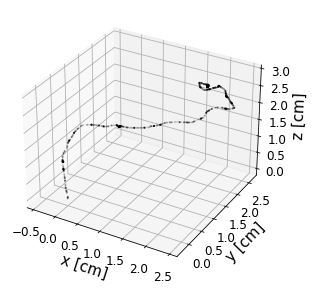

In [19]:
track_index = 3

track = tracks.iloc[track_index].track
plot_track(track)

# Add diffusion to raw tracks

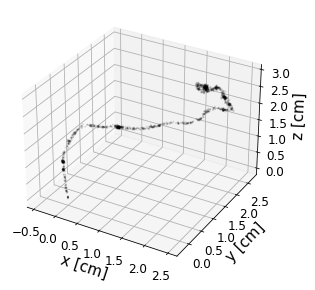

In [20]:
# The paramters, in order, are:
# tracks, a dataframe with the raw track info
# Transverse diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]
# Longitudinal diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]
tracks = xyStripTools.add_diff(tracks, DTrans = 0.0135, DLong = 0.0129)

# Plot a Track
track = tracks.iloc[track_index]["diff_track"]
plot_track(track)

# Simulate readout


Simulates a 10 cm x 10 cm readout plane in the xy-plane centered at the origin

In [21]:
# the parameters, in order, are:
# peaking time [ns]
# digitization time [ns] 
# pitch of the x strips [um]
# pitch of the y strips [um]
# Threshold of x strips [No. electrons]
# Threshold of y strips [No. electrons]
# Charge sharing [lower strips / upper strips]
# Gain - extrapolating from PHA curve
# drift speed cm/ns
# Include charge integration effect.
# z resolution in cm, must be specified if Charge_integration = False
# Electronic gain in x [mV/fC]
# Electronic gain in y [mV/fC]
hits = xyStripTools.sim_readout(tracks, peaking_time = 200, digit_t  = 250, pitch_x = 200, pitch_y = 200,thres_x = 82/9.0*6241.5, thres_y =  82/4.5*6241.5, CS = 0.62, Gain = 60000, v_drift = v_drift, Charge_integration = True, DL = 1.2, pitch_z = 0.02, G_x = 9.0, G_y = 4.5)
tracks = pd.concat([tracks,hits],axis=1)
tracks.head()

,event_number,npoints,x,y,z,t,q,track,diff_track,strips_x,...,times_x,times_y,electrons_x,electrons_y,adcs0,adcs1,strips0,strips1,times0,times1
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019...","[[-1.5404659849047753, 0.17530187104570905, 2....","[-2.1100000000000616, -2.090000000000062, -2.0...",...,"[3304.5893092511055, 3126.191809229722, 3100.9...","[2889.4829788054744, 2886.8959956320996, 2862....","[68888.88888888889, 183703.70370370368, 206666...","[259259.25925925924, 296296.2962962963, 370370...","[99.33509573019306, 264.8935886138481, 298.005...","[186.92087906219123, 213.6238617853614, 267.02...","[144, 145, 146, 147, 147, 148, 148, 149, 149, ...","[249, 250, 251, 252, 253, 253, 254, 254, 255, ...","[3304.5893092511055, 3126.191809229722, 3100.9...","[2889.4829788054744, 2886.8959956320996, 2862...."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011...","[[-2.244323153067311, -1.6294024564982805, 4.7...","[-2.3100000000000573, -2.2900000000000578, -2....",...,"[5924.370892181424, 5918.371955547818, 5903.81...","[5914.396466391723, 5904.529079098404, 5917.03...","[321481.48148148146, 551111.1111111111, 597037...","[333333.3333333333, 1444444.4444444443, 155555...","[463.5637800742343, 794.6807658415445, 860.904...","[240.3268445085316, 1023.0, 1023.0, 1023.0, 90...","[134, 135, 136, 137, 138, 139, 140, 141, 142, ...","[166, 167, 168, 169, 170, 171, 172, 173, 174, ...","[5924.370892181424, 5918.371955547818, 5903.81...","[5914.396466391723, 5904.529079098404, 5917.03..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530...","[[-3.020723048128511, -1.4606573561008465, 3.2...","[-3.1100000000000403, -3.0900000000000407, -3....",...,"[4059.5473287043937, 4046.99797016419, 4071.50...","[4076.6523615393144, 4067.5425841633, 4068.629...","[252592.59259259258, 826666.6666666666, 110222...","[185185.18518518517, 740740.7407407407, 125925...","[364.2286843440412, 1023.0, 1023.0, 1023.0, 92...","[133.51491361585087, 534.0596544634035, 907.90...","[94, 95, 96, 97, 98, 99, 99, 100, 101, 102, 10...","[173, 174, 175, 176, 177, 178, 179, 179, 180, ...","[4059.5473287043937, 4046.99797016419, 4071.50...","[4076.6523615393144, 4067.5425841633, 4068.629..."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508...","[[1.9528051455789022, 2.0054899516565183, 2.74...","[-0.33000000000009955, -0.3100000000001, -0.29...",...,"[1678.2075384295392, 1664.7661925778937, 1630....","[77.40598970860441, 55.16831397390262, 654.273...","[91851.85185185184, 528148.1481481481, 574074....","[222222.22222222222, 259259.25925925924, 29629...","[132.44679430692406, 761.5690672648134, 827.79...","[160.21789633902105, 186.92087906219123, 213.6...","[233, 234, 235, 236, 237, 239, 240, 241, 242, ...","[249, 250, 252, 253, 254, 255, 256, 257, 258, ...","[1678.2075384295392, 1664.7661925778937, 1630....","[77.40598970860441, 55.16831397390262, 654.273..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0..."

# Perform 3D Reconstruction

[1.62601239e+03 1.61257105e+03 1.57831283e+03 1.52814133e+03
 1.43172419e+03 1.17761371e+03 1.12569769e+03 9.92506073e+02
 9.21576605e+02 8.89991347e+02 6.98122519e+02 1.79008197e+03
 6.24779031e+02 1.80625417e+03 4.36072641e+02 1.79960702e+03
 3.15270104e+02 2.27536120e+02 1.81436343e+03 0.00000000e+00
 1.83092576e+03 1.26764760e+00 1.82624089e+03 1.84318421e+03
 1.82001635e+03 1.83402368e+03 1.82624469e+03 1.84897249e+03
 1.89159425e+03 1.92460993e+03 1.92575718e+03 1.90696118e+03
 1.90570294e+03 1.90448040e+03 1.91741371e+03 1.93163842e+03
 1.92875193e+03 1.95483225e+03 1.94797892e+03 1.96844761e+03
 1.93282397e+03 1.95026297e+03 1.95879010e+03 1.94951653e+03
 1.96965751e+03 1.99177320e+03 1.97129715e+03 1.98387473e+03
 1.96240663e+03 1.97024412e+03 1.95653904e+03 1.94865025e+03
 1.93902786e+03 1.94153481e+03 1.91708303e+03 1.92122054e+03
 1.92504206e+03 1.91964326e+03 1.91730185e+03 1.89357230e+03
 1.90236968e+03 1.84514184e+03 1.82835007e+03 1.83660999e+03
 1.81109494e+03 1.827377

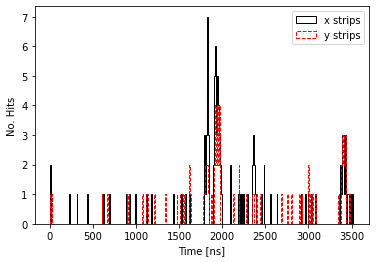

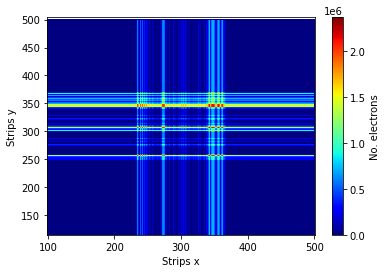

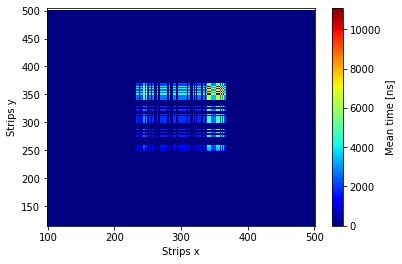

/Users/majdghrear/Desktop/xystripRO/xyStripTools.py:659: RuntimeWarning: invalid value encountered in reciprocal
  abs_t_off = np.reciprocal(abs_t_off,where= abs_t_off!=0)


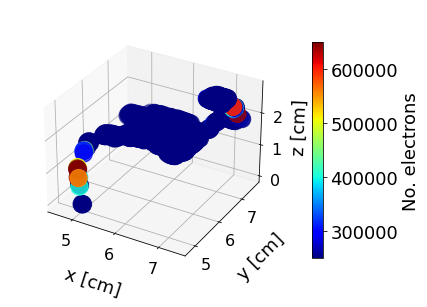

In [22]:

# 3D clustering paramters
mu = T_off.iloc[0]["Mu"]
sigma = T_off.iloc[0]["Sigma"]
n_sigma = 3

# Look at a single event after the cut
test_event = tracks.iloc[track_index]
# Make a TrackTools object for the event
dsp = xyStripTools.TrackTools(event = test_event, Mult_factor = 1.0, gain_x=9, gain_y=4.5, v_drift=v_drift*10000)

# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
x,y,z,c = dsp.Reconst3D_v1( mu = mu, sigma = sigma , n_sigma = n_sigma)

# Make voxel plot

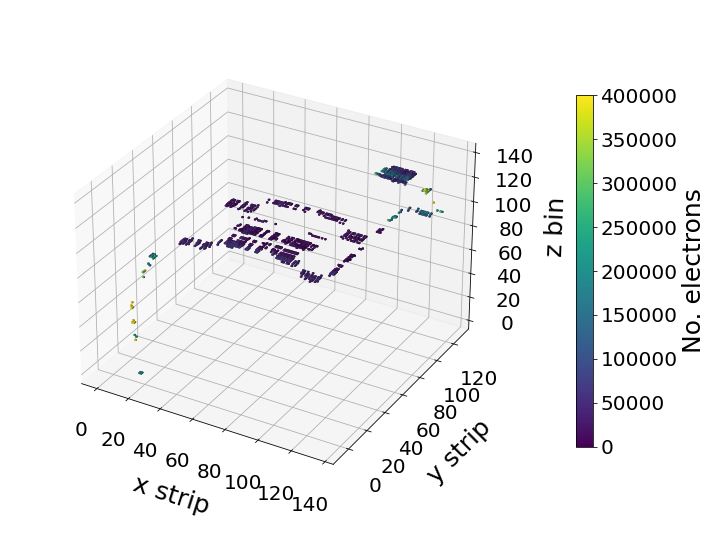

In [23]:
xyStripTools.make_voxel_plot(x,y,z,c)